# Game Theory MP305

## Overview 

This file contains two Python functions for analysing two player $m\times n$ matrix games i.e. a zero sum game where player $A$ has $m$ strategies $A_{1},\ldots, A_{m}$ and player $B$ has $n$ strategies $B_{1},\ldots ,B_{n}$. 

The given payoff matrix `Pay` is defined by an array e.g. `Pay=[[1,2,3],[0,-2,-2]]` for a $2\times 3$ game.

## The function `Saddle` 
This determines whether a matrix game described by a payoff matrix `Pay` has a saddle point solution. The function finds the minimax and the maximin which are equal iff a saddle solution exists  

## The function `MatrixGame2n` 
This determines the optimal mixed solution for a $2\times n$ matrix games with payoff matrix `Pay` i.e. player $A$ has two strategies $A_{1},A_{2}$ and player $B$ has $n$ strategies $B_{1},\ldots ,B_{n}$. 

The output shows the average payoff $U_{j}(p)$ to player $A$ against strategy $B_{j}$ for $j=1,\ldots,n$ where $A$ plays a mixed strategy choosing  $A_{1}$ with probability $p$ and $A_{2}$ with probability $1-p$. The optimal choice for $p$ is also computed where the average loss is minimized for player $A$. 


In [1]:
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt

## The function `Saddle` 
This determines whether a matrix game described by a payoff matrix `Pay` has a saddle point solution. The function finds the minimax and the maximin which are equal iff a saddle solution exists  


In [2]:
def Saddle (Pay):
    a = np.matrix(Pay)
    m,n = a.shape
    minimax = max(a[i,0] for i in range(m))
    for j in range(1, n):
        minimax = min(minimax, max(a[i,j] for i in range(m)))
    maximin = min(a[0,j] for j in range(n))
    for i in range(1, m):
        maximin = max(maximin, min(a[i,j] for j in range(n)))  
    if maximin == minimax:
        print("Saddle Point Solution exists with Value", maximin)
    else:
        print("No Saddle Point Solution Exists")
        print("The minimax is ", minimax)
        print("The maximin is ", maximin)


## Some Examples 

In [3]:
Pay1=[[1,2],[0,-2]]

Saddle(Pay1)

Saddle Point Solution exists with Value 1


In [4]:
Pay2=[[0,13,-5,1],[-13,0,8,-12],[5,-8,0,6],[-1,12,-6,0]]

Saddle(Pay2)

No Saddle Point Solution Exists
The minimax is  5
The maximin is  -5


In [5]:
Pay3=[[1, 2, 4, 0], [0, -2, -3, 2]]

Saddle(Pay3)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  0


In [6]:
Pay4=[[1, 4, 0], [1, -2, 4], [-1, 2, 3]]

Saddle(Pay4)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  0


## The function `MatrixGame2n` 
This determines the optimal mixed solution for a $2\times n$ matrix game with payoff matrix `Pay`.  

In [7]:
def MatrixGame2n(Pay):
# function to analyse 2 matrix game with 2 by n pay-off Pay
    a=np.matrix(Pay)
    m,n=a.shape
    if not m==2:
        return("Warning: The Payoff matrix is not 2 by n")
    U=set()
    for j in range(n):
        U=U | set([(a[0,j]-a[1,j],a[1,j])]) # Utility U[j][0]p + U[j][1]
    p0=0
    Umaxmin=min([a[1,j] for j in range(n)]) # min at p=0
    pmaxmin=p0

    # find Uj with min at p0

    while not U==set():
        Umin=list(U)[0] # pick element of U
        for Uj in U: 
            Ujp0=p0*Uj[0]+Uj[1]
            if Ujp0<Umin[1]:
                Umin=Uj
        # intercepts with Umin
        Unew=set()
        pintlist=[]
        for Uj in U:
            if Uj[0]<Umin[0]: #slope Uj< slope Umin
                pintj=-Fraction((Uj[1]-Umin[1]),(Uj[0]-Umin[0]))
                Upintj=pintj*Uj[0]+Uj[1]
                if pintj >=0 and pintj <=1:
                    pintlist=pintlist+[pintj]
                    Unew=Unew | set([Uj]) # reduced Uj set  
        U=Unew
        if U==set():
            Up1=Umin[0]+Umin[1]
            if Umaxmin<Up1: # unique positive slope min Uj
                pmaxmin=1
                Umaxmin=Up1
        else:
            p0=min(pintlist)
            Up0=p0*Umin[0]+Umin[1]
            if Umaxmin<Up0:
                pmaxmin=p0
                Umaxmin=Up0
            if len(U)==1: 
                Up1=list(U)[0][0]+list(U)[0][1]
                if Umaxmin<Up1:
                    pmaxmin=1
                    Umaxmin=Up1
    print("Optimal strategy is (A_1,A_2) played with probabilities (",pmaxmin,",",1-pmaxmin, ") and with average pay-off of",Umaxmin)
    plt.figure(figsize=(7, 7))
    plt.xlim([0, 1]) 
    plt.xlabel('p',size=15)
    plt.ylabel('Average Payoff',size=15)
    plt.plot([pmaxmin], [Umaxmin], marker=".", markersize=30)      
    for j in range(n):
        plt.plot([0,1],[a[1,j],a[0,j]])

[[1, 2], [0, -2]]
Saddle Point Solution exists with Value 1
Optimal strategy is (A_1,A_2) played with probabilities ( 1 , 0 ) and with average pay-off of 1


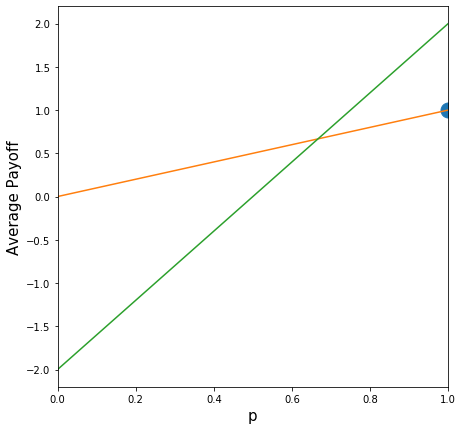

In [8]:
print(Pay1)
Saddle(Pay1)
MatrixGame2n(Pay1)

In [9]:
print(Pay2)
Saddle(Pay2)
MatrixGame2n(Pay2)

[[0, 13, -5, 1], [-13, 0, 8, -12], [5, -8, 0, 6], [-1, 12, -6, 0]]
No Saddle Point Solution Exists
The minimax is  5
The maximin is  -5


'Warning: The Payoff matrix is not 2 by n'

[[1, 2, 4, 0], [0, -2, -3, 2]]
No Saddle Point Solution Exists
The minimax is  1
The maximin is  0
Optimal strategy is (A_1,A_2) played with probabilities ( 2/3 , 1/3 ) and with average pay-off of 2/3


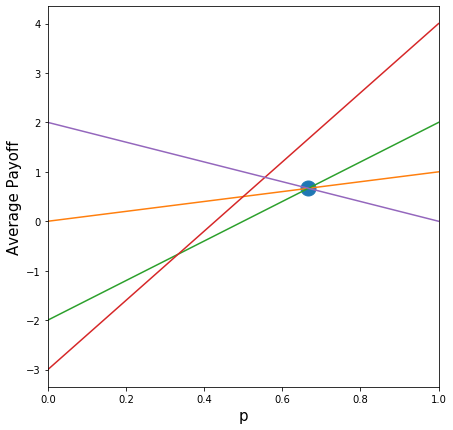

In [10]:
print(Pay3)
Saddle(Pay3)
MatrixGame2n(Pay3)

In [11]:
print(Pay4)
Saddle(Pay4)
MatrixGame2n(Pay4)

[[1, 4, 0], [1, -2, 4], [-1, 2, 3]]
No Saddle Point Solution Exists
The minimax is  1
The maximin is  0


'Warning: The Payoff matrix is not 2 by n'

No Saddle Point Solution Exists
The minimax is  0
The maximin is  -13
Optimal strategy is (A_1,A_2) played with probabilities ( 1/2 , 1/2 ) and with average pay-off of -13/2


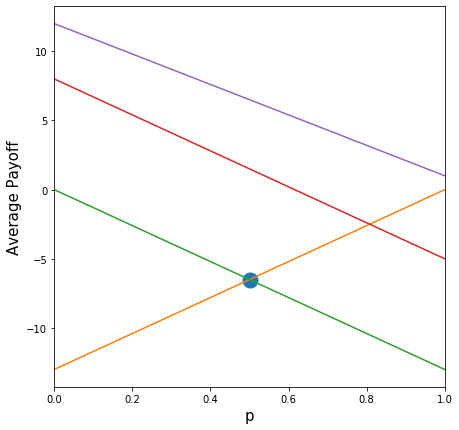

In [12]:
Pay=[[0,-13,-5,1],
     [-13,0,8,+12]]
Saddle(Pay)
MatrixGame2n(Pay)

# Question One

In [13]:
PayA=[[1,2],[0,-2]]
Saddle(PayA)

Saddle Point Solution exists with Value 1


In [14]:
PayB=[[1,-1],[-1,1]]
Saddle(PayB)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  -1


In [15]:
PayC=[[1,2,4,0],[0,-2,-3,4]]
Saddle(PayC)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  0


In [16]:
PayD=[[1,0,4,1],[-1,-4,-3,4]]
Saddle(PayD)

Saddle Point Solution exists with Value 0


In [17]:
PayE=[[0,2,-1],[-2,0,3],[1,-3,0]]
Saddle(PayE)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  -1


In [18]:
PayF=[[0,13,-5,1],[-13,0,8,-12],[5,-8,0,6],[-1,12,-6,0]]
Saddle(PayF)

No Saddle Point Solution Exists
The minimax is  5
The maximin is  -5


# Question Two

## Game C

## (a)

The matrix has for strategy $B1$ that the payoff if $A$ plays $A1$ is $P_1=1$, and $P_2=0$ if $A$ plays $A2$.
So, the average payoff against $B1$ is $U_1(p)=p\times{P_1}+\left(1-p\right)\times{P_2}=p$.

The matrix has for strategy $B2$ that the payoff if $A$ plays $A1$ is $P_1=2$, and $P_2=-2$ if $A$ plays $A2$.
So, the average payoff against $B1$ is $U_1(p)=p\times{P_1}+\left(1-p\right)\times{P_2}=2\times p - 2 \times \left(1-p \right)=4p-2$.

The matrix has for strategy $B3$ that the payoff if $A$ plays $A1$ is $P_1=4$, and $P_2=-3$ if $A$ plays $A2$.
So, the average payoff against $B1$ is $U_1(p)=p\times{P_1}+\left(1-p\right)\times{P_2}=4\times p - 3 \times \left(1-p \right)=7p-3$.

The matrix has for strategy $B4$ that the payoff if $A$ plays $A1$ is $P_1=0$, and $P_2=1$ if $A$ plays $A2$.
So, the average payoff against $B1$ is $U_1(p)=p\times{P_1}+\left(1-p\right)\times{P_2}= 4 \times \left(1-p \right)=4-4p$.

## (b)

No Saddle Point Solution Exists
The minimax is  1
The maximin is  0
Optimal strategy is (A_1,A_2) played with probabilities ( 4/5 , 1/5 ) and with average pay-off of 4/5


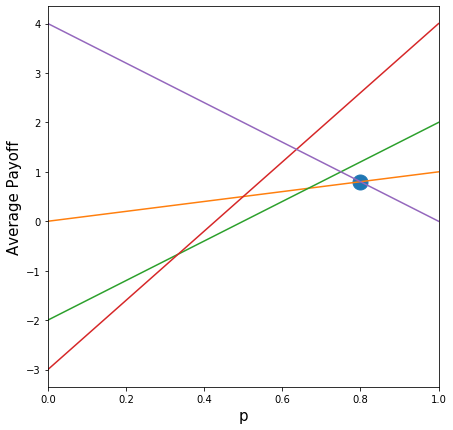

In [19]:
PayC=[[1,2,4,0],[0,-2,-3,4]]
Saddle(PayC)
MatrixGame2n(PayC)

Examining the initial matrix, we see that the line starting at $-3$ is $B_3$, at $-2$ is $B_2$, at $0$ is $B_1$ and at $4$ is $B_4$.
The optimal choice of $p$ looking at the diagram is $p\approx0.8$, where the blue spot lies i.e. the maximum possible minimum of all the payoffs. We could verify formulaically that $p=0.8$ is indeed correct but this isn't necessary.

## (c)

We assume that $A$ plays perfectly, so in such a case the only two strategies $B$ can play to minimise their losses are the lines where the blue spot lies i.e. strategies $B1$ and $B4$.

## (d)

We know from (a) the average payoffs against $A$ are $V_1=q$ and $V_2=4\left(1-q\right)$ for strategies $B1$ and $B4$ respectively. The optimal choice is when $V_1=V_2$. Thus, $q=4\left(1-q\right)\implies q=0.8$. This means that it is optimal for $B$ to play $B_1$ 80% of the time and $B_4$ the remaining 20% of the time.

## Game D

## (a)

The matrix has for strategy $B1$ that the payoff if $A$ plays $A1$ is $P_1=1$, and $P_2=-1$ if $A$ plays $A2$.
So, the average payoff against $B1$ is $U_1(p)=p\times{P_1}+\left(1-p\right)\times{P_2}=1 \times p-1\times \left( 1-p \right)=2p-1$.

The matrix has for strategy $B2$ that the payoff if $A$ plays $A1$ is $P_1=0$, and $P_2=-4$ if $A$ plays $A2$.
So, the average payoff against $B1$ is $U_1(p)=p\times{P_1}+\left(1-p\right)\times{P_2}= - 4 \times \left(1-p \right)=4p-4$.

The matrix has for strategy $B3$ that the payoff if $A$ plays $A1$ is $P_1=4$, and $P_2=-3$ if $A$ plays $A2$.
So, the average payoff against $B1$ is $U_1(p)=p\times{P_1}+\left(1-p\right)\times{P_2}=4\times p - 3 \times \left(1-p \right)=7p-3$.

The matrix has for strategy $B4$ that the payoff if $A$ plays $A1$ is $P_1=1$, and $P_2=4$ if $A$ plays $A2$.
So, the average payoff against $B1$ is $U_1(p)=p\times{P_1}+\left(1-p\right)\times{P_2}= 1\times p + 4 \times \left(1-p \right)=4-3p$.

## (b)

Saddle Point Solution exists with Value 0
Optimal strategy is (A_1,A_2) played with probabilities ( 1 , 0 ) and with average pay-off of 0


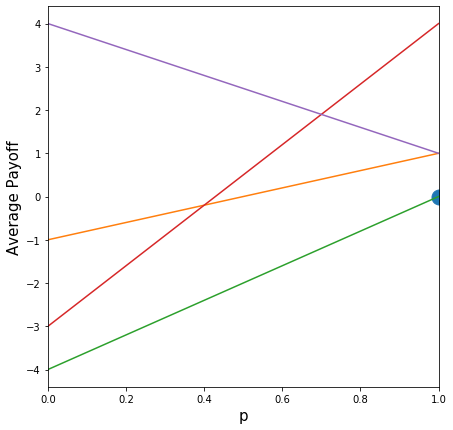

In [21]:
PayD=[[1,0,4,1],[-1,-4,-3,4]]
Saddle(PayD)
MatrixGame2n(PayD)

Examining the initial matrix, we see that the line starting at $-3$ is $B_3$, at $-4$ is $B_2$, at $-1$ is $B_1$ and at $4$ is $B_4$.
The optimal choice of $p$ looking at the diagram is $p=1$, where the blue spot lies i.e. the maximum possible minimum of all the payoffs. We could verify formulaically that $p=1$ is indeed correct but this isn't necessary.

## (c)

We assume that $A$ plays perfectly, so in such a case the only strategy $B$ can play to minimise their losses is the line where the blue spot lies i.e. strategy $B2$. We're asked specifically for two strategies, so the least damaging second strategy would be the orange line on the graph i.e. $B1$ since its max is lower than that of the other possible choices.

## (d)

There is only one strategy that $B$ can optimally play and that is $B2$ i.e. $B$ plays $B2$ a 100% of the time. It is never optimal to play $B1$.